In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/cleaned_311_test_2015.csv', header=0, sep=',', quotechar='"',parse_dates=['created_date', 'closed_date'],
     infer_datetime_format=True)
df.head(5)

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,city,community_board,borough,latitude,longitude,location
0,0,36335488,2017-06-01,2017-06-23,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,10474,BRONX,02 BRONX,BRONX,40.812797,-73.886981,"(40.81279663744078, -73.8869808964065)"
1,1,36334571,2017-06-01,2017-06-22,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11215,BROOKLYN,06 BROOKLYN,BROOKLYN,40.668242,-73.989604,"(40.66824162997938, -73.98960394471317)"
2,2,36334446,2017-06-01,2017-06-21,DOHMH,Department of Health and Mental Hygiene,Unsanitary Pigeon Condition,Pigeon Waste,10303,STATEN ISLAND,01 STATEN ISLAND,STATEN ISLAND,40.626336,-74.174961,"(40.62633610844385, -74.17496135020113)"
3,3,36332405,2017-06-01,2017-06-22,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,11215,BROOKLYN,06 BROOKLYN,BROOKLYN,40.668242,-73.989604,"(40.66824162997938, -73.98960394471317)"
4,4,36332388,2017-06-01,2017-06-21,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,11105,Astoria,01 QUEENS,QUEENS,40.777379,-73.909192,"(40.777379055532506, -73.9091923175842)"


# Dropping unsignificant complaints

In [3]:
complaint_count = df['complaint_type'].value_counts()
significant_indices = [True if complaint_count[x] > sum(complaint_count)*5/100 else False for x in df['complaint_type']]
df = df[significant_indices]
df['complaint_type'].value_counts()

Noise - Residential        1112
Illegal Parking             984
Blocked Driveway            747
Noise - Street/Sidewalk     683
Name: complaint_type, dtype: int64

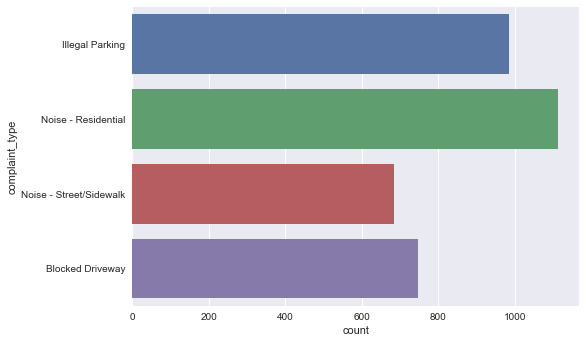

In [4]:
import seaborn as sns
sns.set(style="darkgrid")

#counting by complaint type
complaint_count = sns.countplot(y="complaint_type", data=df)

In [5]:
data = {}
df_concat = {}

categories = df['complaint_type'].unique()

for cat in categories:
    data[cat] = df[df['complaint_type'] == cat]
    data[cat]['hour'] = data[cat]['created_date'].apply(lambda x: x.hour)
    df_concat[cat] = data[cat].groupby(['hour'],sort = True).count()
    df_concat[cat] = df_concat[cat]['unique_key']

/Users/virginiedo/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df_concat

{'Blocked Driveway': hour
 0     24
 1     16
 2     14
 3      9
 4     14
 5     27
 6     31
 7     30
 8     46
 9     40
 10    32
 11    34
 12    30
 13    26
 14    34
 15    30
 16    26
 17    45
 18    41
 19    34
 20    38
 21    42
 22    40
 23    44
 Name: unique_key, dtype: int64, 'Illegal Parking': hour
 0     30
 1     20
 2      6
 3      3
 4     13
 5     12
 6     39
 7     63
 8     56
 9     67
 10    56
 11    55
 12    47
 13    49
 14    29
 15    37
 16    35
 17    30
 18    43
 19    49
 20    64
 21    71
 22    58
 23    52
 Name: unique_key, dtype: int64, 'Noise - Residential': hour
 0     111
 1      54
 2      29
 3      19
 4      19
 5      10
 6       6
 7      12
 8      14
 9      11
 10     12
 11     12
 12     10
 13     15
 14     11
 15     17
 16     24
 17     31
 18     39
 19     56
 20     86
 21    139
 22    183
 23    192
 Name: unique_key, dtype: int64, 'Noise - Street/Sidewalk': hour
 0      54
 1      40
 2      18
 3       9
 4 

# Plotting stacked area chart with Bokeh

In [7]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import brewer,mpl,d3
output_notebook()

Loading BokehJS ...

In [8]:
def stacked(df, categories):
    areas = dict()
    last = np.zeros(len(df[categories[0]]))
    for cat in categories:
        next = last + df[cat]
        areas[cat] = np.hstack((last[::-1], next))
    return areas

In [9]:
areas = stacked(df_concat, categories)
areas

{'Blocked Driveway': array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  24.,  16.,  14.,   9.,  14.,  27.,  31.,  30.,  46.,
         40.,  32.,  34.,  30.,  26.,  34.,  30.,  26.,  45.,  41.,  34.,
         38.,  42.,  40.,  44.]),
 'Illegal Parking': array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  30.,  20.,   6.,   3.,  13.,  12.,  39.,  63.,  56.,
         67.,  56.,  55.,  47.,  49.,  29.,  37.,  35.,  30.,  43.,  49.,
         64.,  71.,  58.,  52.]),
 'Noise - Residential': array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  111.,   54.,   29.,
          19.,   19.,   10.,    6.,   12.,   14.,   11.,   12.,  

In [10]:
#colors = brewer["Spectral"][11]
#colors = mpl['Magma'][256]
colors = d3['Category20'][20]
x = np.arange(24)
x2 = np.hstack((x[::-1], x))
print(x[::-1])
print( x2 )

[23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
[23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0  0
  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [11]:
##Plotting directly without legend

p = figure(x_range=(0, 24), y_range=(0,500))
p.grid.minor_grid_line_color = '#eeeeee'

p.patches([x2] * len(areas), [areas[cat] for cat in categories],
          color=colors, alpha=0.8, line_color=None)
show(p)

/Users/virginiedo/miniconda2/lib/python2.7/site-packages/bokeh/models/sources.py:91: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 20), ('xs', 4), ('ys', 4)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [13]:
#p = figure(x_range=(0, 50), y_range=(0,100000))
#p.grid.minor_grid_line_color = '#eeeeee'

i = 0
for cat in categories:
    p.patch(x2, areas[cat], color=colors[i], legend=cat, alpha=0.8, line_color=None)
    i = (i+1)%20

show(p)